In [1]:
# 라이브러리
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

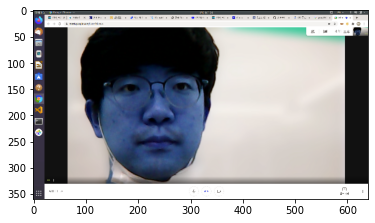

In [2]:
# image경로
img_path = "./data/img.jpg"
# openCV로 이미지 열기 -> BGR
img_bgr = cv2.imread(img_path)
# Image resize
img_bgr = cv2.resize(img_bgr, (640,360))
# 출력용 이미지 별도 보관
img_show = img_bgr.copy()
# img show
plt.imshow(img_bgr)
plt.show()

In [3]:
# dlib face_detector불러오기
detector_hog = dlib.get_frontal_face_detector()

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

In [5]:
print(dlib_rects)

rectangles[[(117, 93) (340, 316)]]


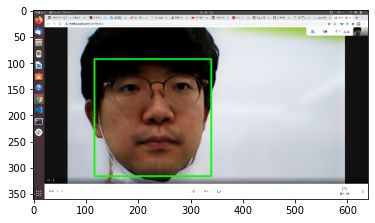

In [6]:
# 얼국찾기
for dlib_rect in dlib_rects:
    # left, top, right, bottom 추출
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# RGB값으로 변환
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# image show
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# model path
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

In [8]:
# landmark dectector 불러오기
landmark_predictor = dlib.shape_predictor(model_path)

In [9]:
landmark_predictor

In [10]:
# landmark를 저장할 리스트 생성
list_landmarks = []
for dlib_rect in dlib_rects:
    # 얼굴안에서 랜드마크 찾기
    points = landmark_predictor(img_rgb, dlib_rect)
#     print(points.parts()) 
    # tuple형태로 위치값이 들어가 있음
    # 리스트에저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [11]:
# 랜드마크 리스트를 하나씩 받아서
for landmark in list_landmarks:
    # 인덱스와 위치값(tuple형태)을 받아옴
    for idx, point in enumerate(list_points):
        # 받은 이미지를 노랑으로 변환
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

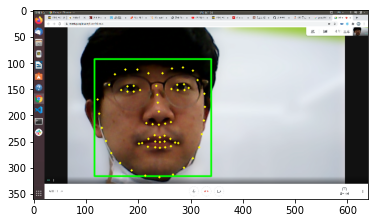

In [12]:
# RGB값으로 변환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지 출력
plt.imshow(img_show_rgb)
plt.show()

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[33][0]
    y = landmark[33][1]# - dlib_rect.width()//2
    # 얼굴을 인식한 사각형의 크기
    w = dlib_rect.width()
    h = dlib_rect.width()
    print (f'(x,y) : {x,y}')
    print (f'(w,h) : {w,h}')

(240, 193)
(x,y) : (240, 218)
(w,h) : (224, 224)


In [14]:
# 고양이 수염 사진 불러오기 - slack에서 공유받은 사진
sticker_path = './data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(224, 224, 3)


In [15]:
refined_x = x - img_sticker.shape[1] // 2  # left
refined_y = y + img_sticker.shape[0] // 2  # top
print (f'(x,y) : {refined_x, refined_y}')
if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print (f'(x,y) : {refined_x, refined_y}')

(x,y) : (128, 330)


In [16]:
# refined_y - img_sticker.shape[0]
print(330 - 224)
# refined_x + img_sticker.shape[1]
print(128 + 224)

106
352


In [17]:
# sticker 영역 구하기
sticker_area = img_show[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]]
# 원래 이미지의 스티커 영역에 스티커 붙히기
img_show[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) # np.where(조건, 맞을때 실행, 아닐때 실행)

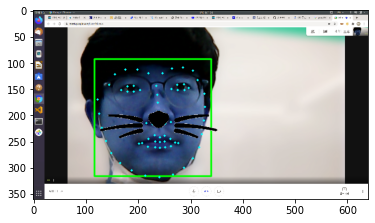

In [18]:
# 수염 이미지 확인
plt.imshow(img_show)

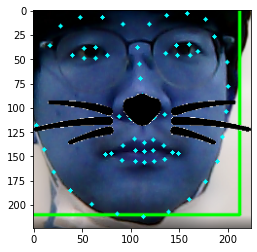

In [19]:
# 수염 영역만 확대
plt.imshow(img_show[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]])

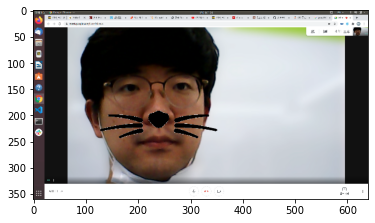

In [20]:
# 출력용 사진에 적용
sticker_area = img_bgr[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()